In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("rq2_analysis_with_mention_150_results_full (1).csv")


Bar Chart of Security Mentions by LLM

• Description: Create a bar chart showing the number of times each LLM mentioned 
security concerns across the 150 Stack Overflow questions. Steps: 

1. Load the data into a Pandas DataFrame.

2. Group the data by LLM and count the number of security mentions. 

3. Use Matplotlib to create a bar chart with LLM models on the x-axis and the number of security mentions on the y-axis

      LLM  Security_Mentions
0   llama                 38
1  claude                 24
2     gpt                 53


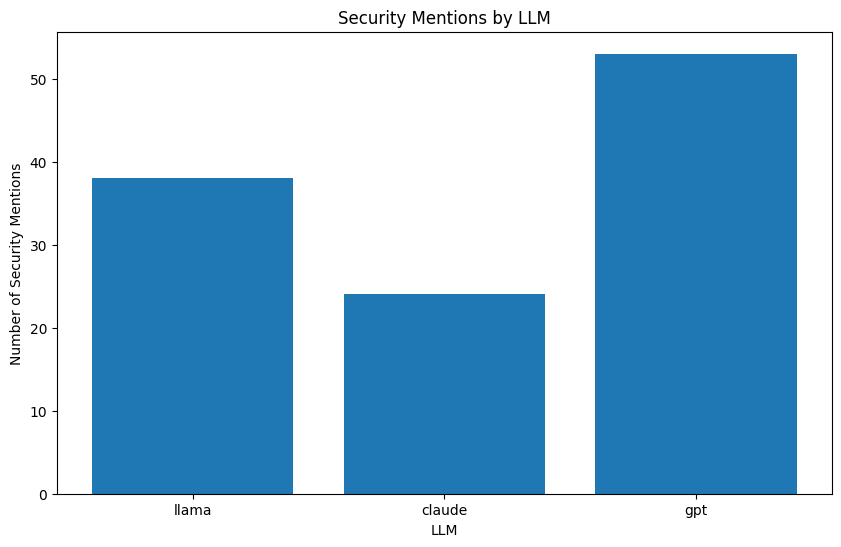

In [39]:

df['llama3_security_mention'] = pd.to_numeric(df['llama3_security_mention'], errors='coerce').fillna(0).astype(int)
df['claude3_security_mention'] = pd.to_numeric(df['claude3_security_mention'], errors='coerce').fillna(0).astype(int)
df['gpt4_security_mention'] = pd.to_numeric(df['gpt4_security_mention'], errors='coerce').fillna(0).astype(int)

llm_security_mentions = pd.DataFrame({
    'LLM': ['llama', 'claude', 'gpt'],
    'Security_Mentions': [
        df['llama3_security_mention'].sum(),
        df['claude3_security_mention'].sum(),
        df['gpt4_security_mention'].sum()
    ]
})


security_mentions_df = pd.DataFrame(list(llm_security_mentions.items()), columns=['LLM', 'Security Mentions'])
print(llm_security_mentions)

plt.figure(figsize=(10, 6))
plt.bar(llm_security_mentions['LLM'], llm_security_mentions['Security_Mentions'], color=['blue', 'green', 'red'])
plt.xlabel('LLM')
plt.ylabel('Number of Security Mentions')
plt.title('Security Mentions by LLM')
plt.show()


Pie Chart for Causes, Exploits, and Fixes
Description: Create a chart showing the number of times each LLM provided information about the causes, potential exploits, and fixes of the vulnerabilities. Steps:

1. Group the data by LLM and sum the counts for causes, exploits, and fixes.
2. Use Matplotlib to create a stacked bar chart with LLM models on the x-axis and counts of mentions on the y-axis. Stack the bars for causes, exploits, and fixes

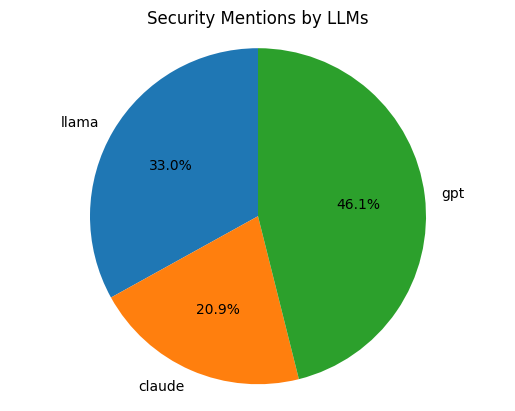

In [41]:
data = {
    'llama3': {
        'causes': df['llama3_causes'].sum(),
        'exploits': df['llama3_exploits'].sum(),
        'fixes': df['llama3_fixes'].sum()
    },
    'claude3': {
        'causes': df['claude3_causes'].sum(),
        'exploits': df['claude3_exploits'].sum(),
        'fixes': df['claude3_fixes'].sum()
    },
    'gpt4': {
        'causes': df['gpt4_causes'].sum(),
        'exploits': df['gpt4_exploits'].sum(),
        'fixes': df['gpt4_fixes'].sum()
    }
}

labels = llm_security_mentions['LLM']
sizes = llm_security_mentions['Security_Mentions']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Security Mentions by LLMs')
plt.show()
# pie chart instead?

pie chart for each category (Causes, Exploits, and Fixes), 


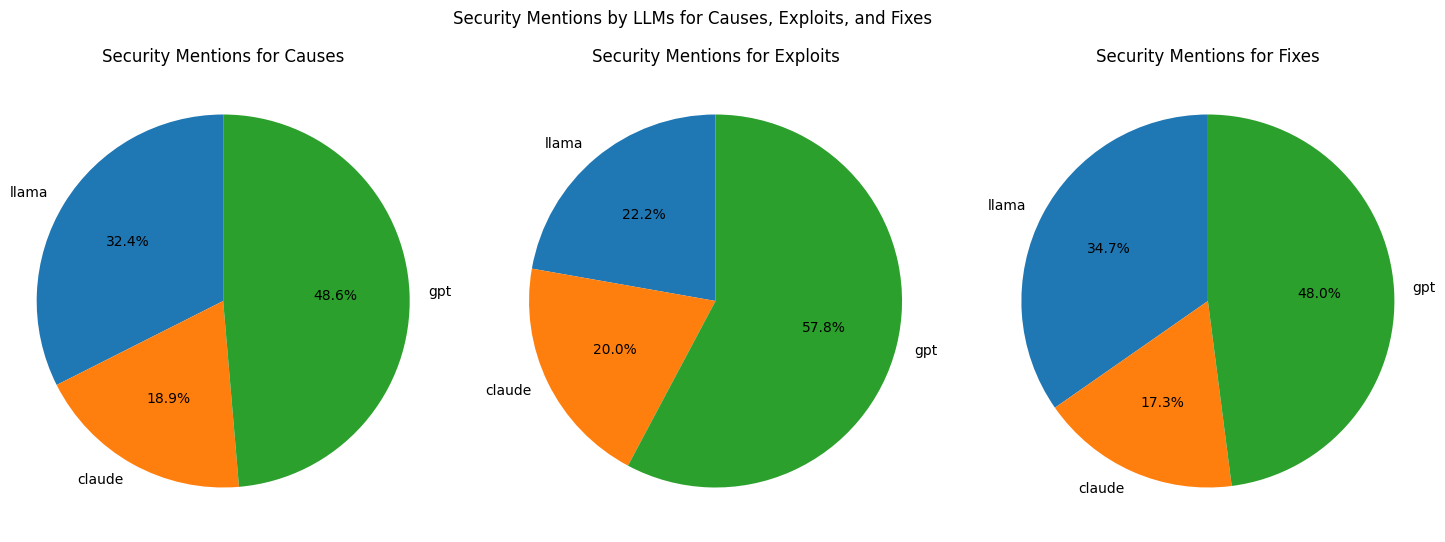

In [38]:
df['llama3_causes'] = pd.to_numeric(df['llama3_causes'], errors='coerce').fillna(0).astype(int)
df['llama3_exploits'] = pd.to_numeric(df['llama3_exploits'], errors='coerce').fillna(0).astype(int)
df['llama3_fixes'] = pd.to_numeric(df['llama3_fixes'], errors='coerce').fillna(0).astype(int)

df['claude3_causes'] = pd.to_numeric(df['claude3_causes'], errors='coerce').fillna(0).astype(int)
df['claude3_exploits'] = pd.to_numeric(df['claude3_exploits'], errors='coerce').fillna(0).astype(int)
df['claude3_fixes'] = pd.to_numeric(df['claude3_fixes'], errors='coerce').fillna(0).astype(int)

df['gpt4_causes'] = pd.to_numeric(df['gpt4_causes'], errors='coerce').fillna(0).astype(int)
df['gpt4_exploits'] = pd.to_numeric(df['gpt4_exploits'], errors='coerce').fillna(0).astype(int)
df['gpt4_fixes'] = pd.to_numeric(df['gpt4_fixes'], errors='coerce').fillna(0).astype(int)

llm_security_mentions = pd.DataFrame({
    'LLM': ['llama', 'claude', 'gpt'],
    'Causes': [
        df['llama3_causes'].sum(),
        df['claude3_causes'].sum(),
        df['gpt4_causes'].sum()
    ],
    'Exploits': [
        df['llama3_exploits'].sum(),
        df['claude3_exploits'].sum(),
        df['gpt4_exploits'].sum()
    ],
    'Fixes': [
        df['llama3_fixes'].sum(),
        df['claude3_fixes'].sum(),
        df['gpt4_fixes'].sum()
    ]
})

def create_pie_chart(data, category, ax):
    labels = data['LLM']
    sizes = data[category]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'Security Mentions for {category.capitalize()}')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

create_pie_chart(llm_security_mentions, 'Causes', axs[0])
create_pie_chart(llm_security_mentions, 'Exploits', axs[1])
create_pie_chart(llm_security_mentions, 'Fixes', axs[2])

plt.suptitle('Security Mentions by LLMs for Causes, Exploits, and Fixes')
plt.show()


overlaps charts

Overlap numbers in the number of security mentions:
GPT-4 & LLaMA3: 4
GPT-4 & Claude3: 4
Claude3 & LLaMA3: 4


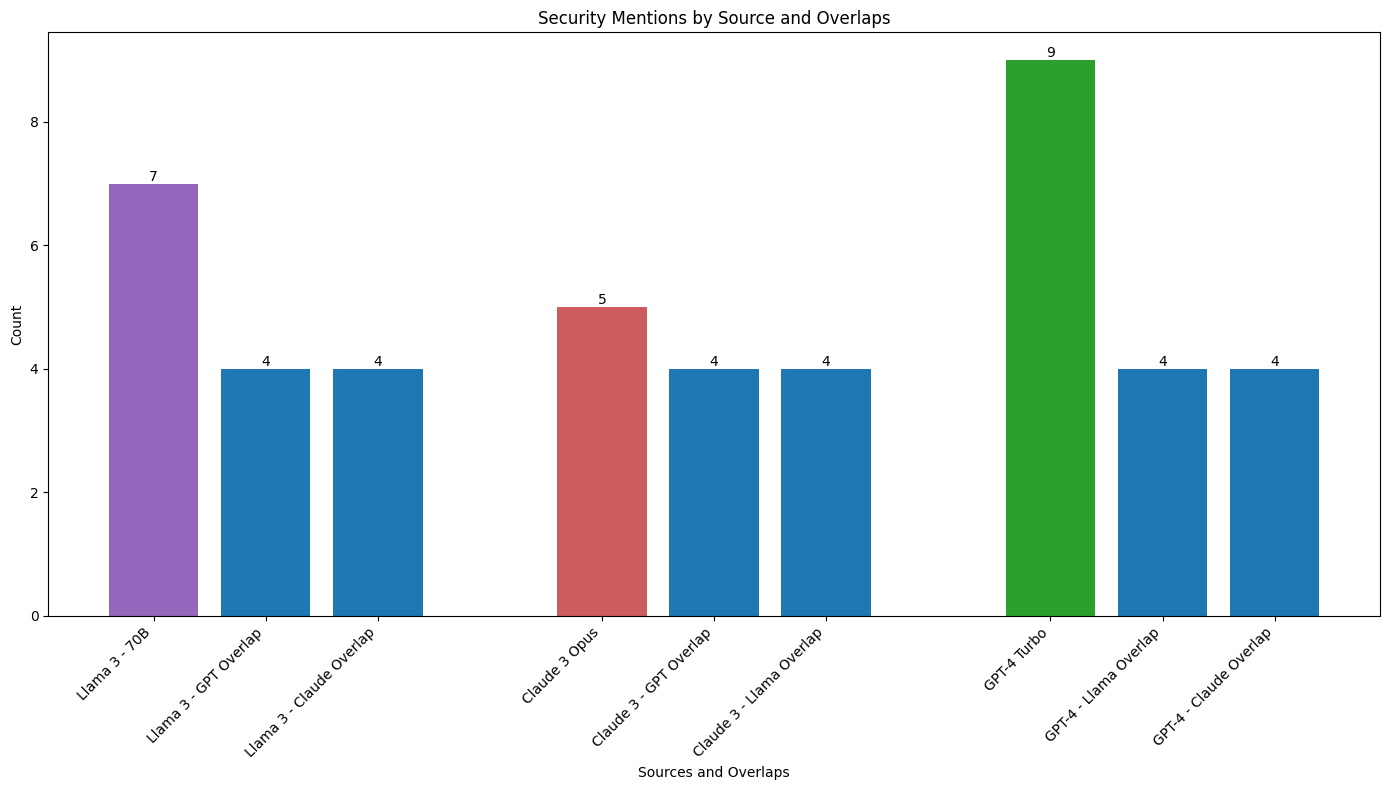

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

unique_links_df = df[df['stackoverflow_link'].duplicated()]

gpt4_links = unique_links_df[unique_links_df['gpt4_security_mention'] == 1]['stackoverflow_link']
llama3_links = unique_links_df[unique_links_df['llama3_security_mention'] == 1]['stackoverflow_link']
claude3_links = unique_links_df[unique_links_df['claude3_security_mention'] == 1]['stackoverflow_link']

overlap_gpt_llama = set(gpt4_links).intersection(set(llama3_links))
overlap_gpt_claude = set(gpt4_links).intersection(set(claude3_links))
overlap_claude_llama = set(claude3_links).intersection(set(llama3_links))

print("Overlap numbers in the number of security mentions:")
print(f"GPT-4 & LLaMA3: {len(overlap_gpt_llama)}")
print(f"GPT-4 & Claude3: {len(overlap_gpt_claude)}")
print(f"Claude3 & LLaMA3: {len(overlap_claude_llama)}")

sources = ['llama3', 'claude3', 'gpt4']
data = []
for source in sources:
    col_name = f'{source}_security_mention'
    count = df[df['stackoverflow_link'].duplicated()][col_name].sum()
    data.append(count)

data_combined = [
    data[0], len(overlap_gpt_llama), len(overlap_claude_llama),
    data[1], len(overlap_gpt_claude), len(overlap_claude_llama),
    data[2], len(overlap_gpt_llama), len(overlap_gpt_claude)
]

bar_labels = [
    'Llama 3 - 70B', 'Llama 3 - GPT Overlap', 'Llama 3 - Claude Overlap',
    'Claude 3 Opus', 'Claude 3 - GPT Overlap', 'Claude 3 - Llama Overlap',
    'GPT-4 Turbo', 'GPT-4 - Llama Overlap', 'GPT-4 - Claude Overlap'
]

x = np.array([0, 0.5, 1, 2, 2.5 ,3, 4, 4.5, 5.])
width = 0.4

colors = ['tab:purple', 'tab:blue', 'tab:blue', 'indianred', 'tab:blue', 'tab:blue', 'tab:green', 'tab:blue', 'tab:blue']

fig, ax = plt.subplots(figsize=(14, 8))

rects = ax.bar(x, data_combined, width, color=colors)

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            f'{data_combined[i]}', ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(bar_labels, rotation=45, ha='right')
ax.set_xlabel('Sources and Overlaps')
ax.set_ylabel('Count')
ax.set_title('Security Mentions by Source and Overlaps')

plt.tight_layout()
plt.show()


Stacked Bar Chart for Causes, Exploits, and Fixes for LLM vs SO

• Description: Create a stacked bar chart showing the percentage of times each LLM or 
Stack Overflow provided information about the causes, potential exploits, and fixes of 
the vulnerabilities they pointed out. Steps: 

1. Calculate the percentage for causes, exploits, and fixes based on the total mentions for each source (LLM and Stack Overflow).
2. Group the data by source and calculate the mean percentages.
3. Use Matplotlib to create a stacked bar chart with sources on the x-axis and percentage of mentions on the y-axis. Stack the bars for causes, exploits, and fixes

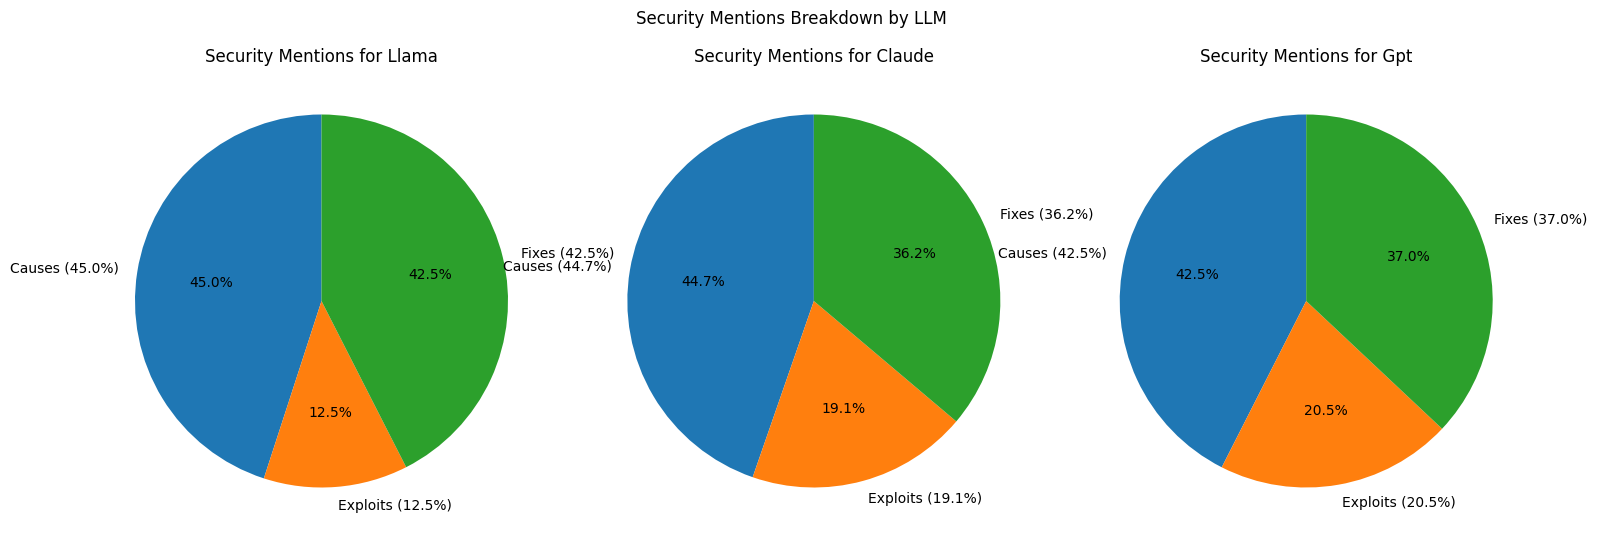

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df['llama3_causes'] = pd.to_numeric(df['llama3_causes'], errors='coerce').fillna(0).astype(int)
df['llama3_exploits'] = pd.to_numeric(df['llama3_exploits'], errors='coerce').fillna(0).astype(int)
df['llama3_fixes'] = pd.to_numeric(df['llama3_fixes'], errors='coerce').fillna(0).astype(int)

df['claude3_causes'] = pd.to_numeric(df['claude3_causes'], errors='coerce').fillna(0).astype(int)
df['claude3_exploits'] = pd.to_numeric(df['claude3_exploits'], errors='coerce').fillna(0).astype(int)
df['claude3_fixes'] = pd.to_numeric(df['claude3_fixes'], errors='coerce').fillna(0).astype(int)

df['gpt4_causes'] = pd.to_numeric(df['gpt4_causes'], errors='coerce').fillna(0).astype(int)
df['gpt4_exploits'] = pd.to_numeric(df['gpt4_exploits'], errors='coerce').fillna(0).astype(int)
df['gpt4_fixes'] = pd.to_numeric(df['gpt4_fixes'], errors='coerce').fillna(0).astype(int)

llm_security_mentions = pd.DataFrame({
    'LLM': ['llama', 'claude', 'gpt'],
    'Causes': [
        df['llama3_causes'].sum(),
        df['claude3_causes'].sum(),
        df['gpt4_causes'].sum()
    ],
    'Exploits': [
        df['llama3_exploits'].sum(),
        df['claude3_exploits'].sum(),
        df['gpt4_exploits'].sum()
    ],
    'Fixes': [
        df['llama3_fixes'].sum(),
        df['claude3_fixes'].sum(),
        df['gpt4_fixes'].sum()
    ]
})

llm_security_mentions['Total'] = llm_security_mentions[['Causes', 'Exploits', 'Fixes']].sum(axis=1)

llm_security_mentions['Causes %'] = (llm_security_mentions['Causes'] / llm_security_mentions['Total']) * 100
llm_security_mentions['Exploits %'] = (llm_security_mentions['Exploits'] / llm_security_mentions['Total']) * 100
llm_security_mentions['Fixes %'] = (llm_security_mentions['Fixes'] / llm_security_mentions['Total']) * 100

def create_pie_chart(data, llm, ax):
    sizes = data.loc[data['LLM'] == llm, ['Causes %', 'Exploits %', 'Fixes %']].values.flatten()
    labels = ['Causes', 'Exploits', 'Fixes']
    ax.pie(sizes, labels=[f'{label} ({size:.1f}%)' for label, size in zip(labels, sizes)], autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'Security Mentions for {llm.capitalize()}')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

create_pie_chart(llm_security_mentions, 'llama', axs[0])
create_pie_chart(llm_security_mentions, 'claude', axs[1])
create_pie_chart(llm_security_mentions, 'gpt', axs[2])

plt.suptitle('Security Mentions Breakdown by LLM')
plt.show()


Heatmap of Security Mentions by CWE and LLM

• Description: Create a heatmap showing the frequency of security mentions for each vulnerability (CWE) across different LLMs. Steps:

1. Pivot the data to have CWEs as rows and LLMs as columns, with the values being the count of security mentions.

2. Use Seaborn to create a heatmap with CWEs on the y-axis, LLM models on the x-axis, and color intensity representing the frequency of security mentions.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('rq2_analysis_with_mention_150_results_full.csv')

# Convert security mention columns to numeric
df['llama3_security_mention'] = pd.to_numeric(df['llama3_security_mention'], errors='coerce').fillna(0).astype(int)
df['claude3_security_mention'] = pd.to_numeric(df['claude3_security_mention'], errors='coerce').fillna(0).astype(int)
df['gpt4_security_mention'] = pd.to_numeric(df['gpt4_security_mention'], errors='coerce').fillna(0).astype(int)

# Process tags to get CWE
df['tags'] = df['tags'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
df = df.explode('tags')
df['tags'] = df['tags'].apply(lambda x: x if 'cwe' in x else None)
df = df.dropna(subset=['tags'])
df['CWE'] = df['tags'].apply(lambda x: x.split('/')[-1])

# Group by CWE and sum the security mentions
heatmap_data = df.groupby('CWE')[['llama3_security_mention', 'claude3_security_mention', 'gpt4_security_mention']].sum()

# Normalize the data
totals = heatmap_data.sum()
heatmap_data_normalized = heatmap_data / totals

print(heatmap_data_normalized)


          llama3_security_mention  claude3_security_mention  \
CWE                                                           
cwe-020                  0.010753                  0.036364   
cwe-022                  0.000000                  0.000000   
cwe-023                  0.000000                  0.000000   
cwe-036                  0.000000                  0.000000   
cwe-073                  0.000000                  0.000000   
cwe-079                  0.053763                  0.072727   
cwe-080                  0.000000                  0.000000   
cwe-089                  0.010753                  0.000000   
cwe-090                  0.010753                  0.000000   
cwe-094                  0.021505                  0.036364   
cwe-095                  0.021505                  0.036364   
cwe-099                  0.000000                  0.000000   
cwe-1004                 0.000000                  0.000000   
cwe-116                  0.053763                  0.09

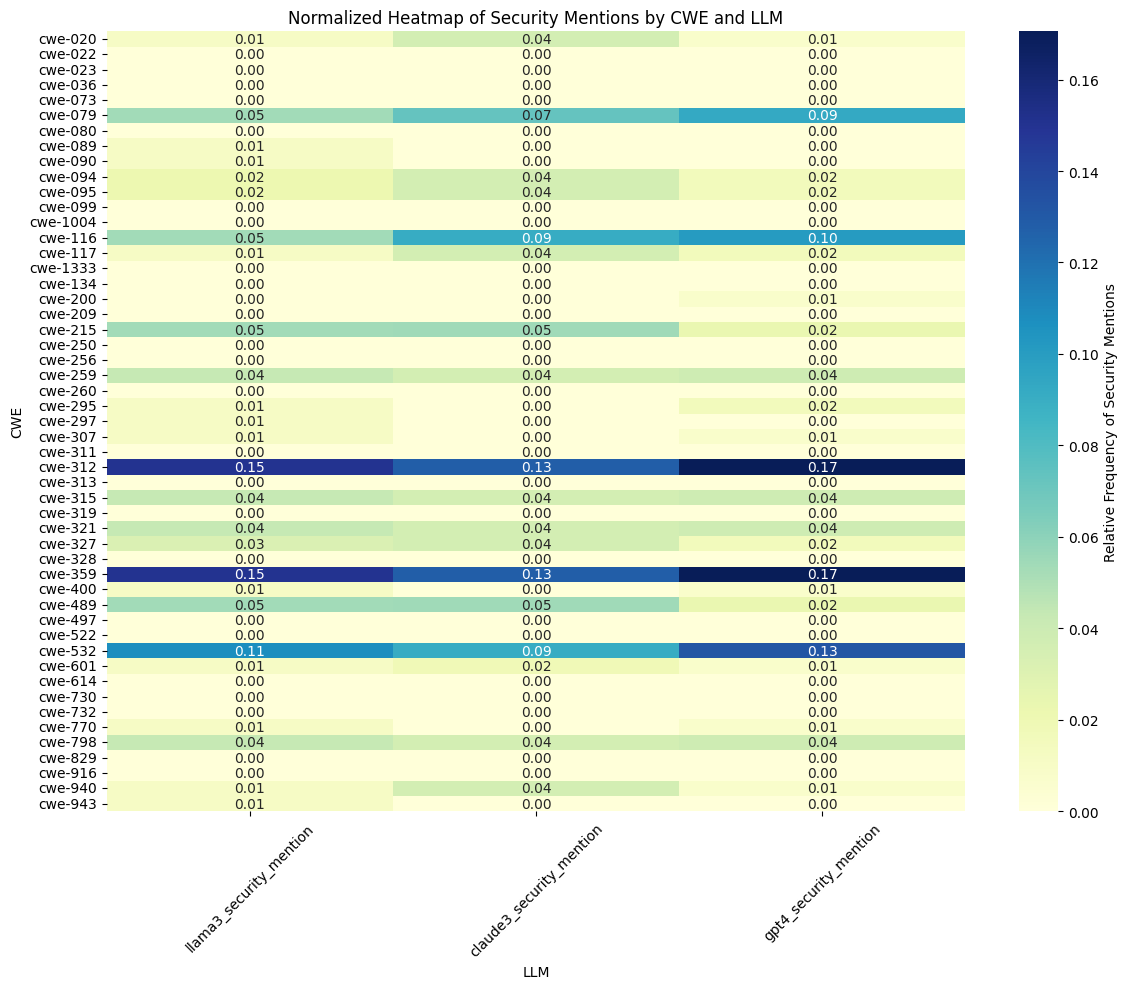

In [53]:

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(heatmap_data_normalized, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Relative Frequency of Security Mentions'})

# Customize the plot
plt.title('Normalized Heatmap of Security Mentions by CWE and LLM')
plt.xlabel('LLM')
plt.ylabel('CWE')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


Heatmap of Mentions of Causes by CWE and LLM
• Description: Create a heatmap showing the frequency of mentions of causes for each 
question across different LLMs and Stack Overflow. • Steps:

1. Pivot the data to have CWEs as rows and LLMs/Stack Overflow as columns, with the values being the count of cause mentions.
2. Use Seaborn to create a heatmap with CWEs on the y-axis, LLM models and Stack Overflow on the x-axis, and color intensity representing the frequency 
of cause mentions.

Note: Repeat similar steps to create separate heatmaps for exploits and fixes.

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('rq2_analysis_with_mention_150_results_full.csv')

# Convert security mention columns to numeric
df['llama3_causes'] = pd.to_numeric(df['llama3_causes'], errors='coerce').fillna(0).astype(int)
df['llama3_exploits'] = pd.to_numeric(df['llama3_exploits'], errors='coerce').fillna(0).astype(int)
df['llama3_fixes'] = pd.to_numeric(df['llama3_fixes'], errors='coerce').fillna(0).astype(int)

df['claude3_causes'] = pd.to_numeric(df['claude3_causes'], errors='coerce').fillna(0).astype(int)
df['claude3_exploits'] = pd.to_numeric(df['claude3_exploits'], errors='coerce').fillna(0).astype(int)
df['claude3_fixes'] = pd.to_numeric(df['claude3_fixes'], errors='coerce').fillna(0).astype(int)

df['gpt4_causes'] = pd.to_numeric(df['gpt4_causes'], errors='coerce').fillna(0).astype(int)
df['gpt4_exploits'] = pd.to_numeric(df['gpt4_exploits'], errors='coerce').fillna(0).astype(int)
df['gpt4_fixes'] = pd.to_numeric(df['gpt4_fixes'], errors='coerce').fillna(0).astype(int)

# Process tags to get CWE
df['tags'] = df['tags'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
df = df.explode('tags')
df['tags'] = df['tags'].apply(lambda x: x if 'cwe' in x else None)
df = df.dropna(subset=['tags'])
df['CWE'] = df['tags'].apply(lambda x: x.split('/')[-1])

# Group by CWE and sum the mentions for each category
causes_data = df.groupby('CWE')[['llama3_causes', 'claude3_causes', 'gpt4_causes']].sum()
exploits_data = df.groupby('CWE')[['llama3_exploits', 'claude3_exploits', 'gpt4_exploits']].sum()
fixes_data = df.groupby('CWE')[['llama3_fixes', 'claude3_fixes', 'gpt4_fixes']].sum()

# Normalize the data if required
causes_data_normalized = causes_data.div(causes_data.sum(axis=1), axis=0).fillna(0)
exploits_data_normalized = exploits_data.div(exploits_data.sum(axis=1), axis=0).fillna(0)
fixes_data_normalized = fixes_data.div(fixes_data.sum(axis=1), axis=0).fillna(0)


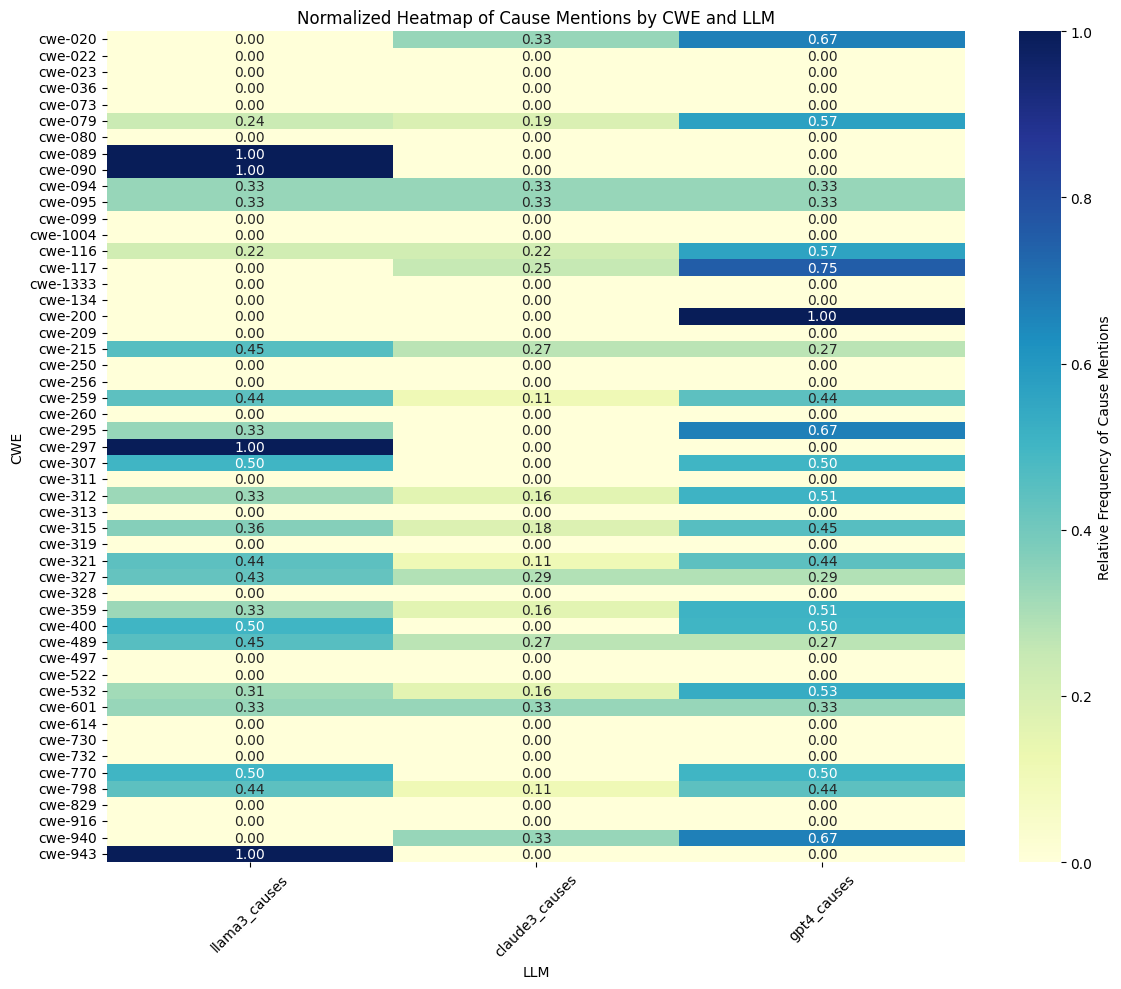

In [60]:
plt.figure(figsize=(12, 10))
sns.heatmap(causes_data_normalized, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Relative Frequency of Cause Mentions'})
plt.title('Normalized Heatmap of Cause Mentions by CWE and LLM')
plt.xlabel('LLM')
plt.ylabel('CWE')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

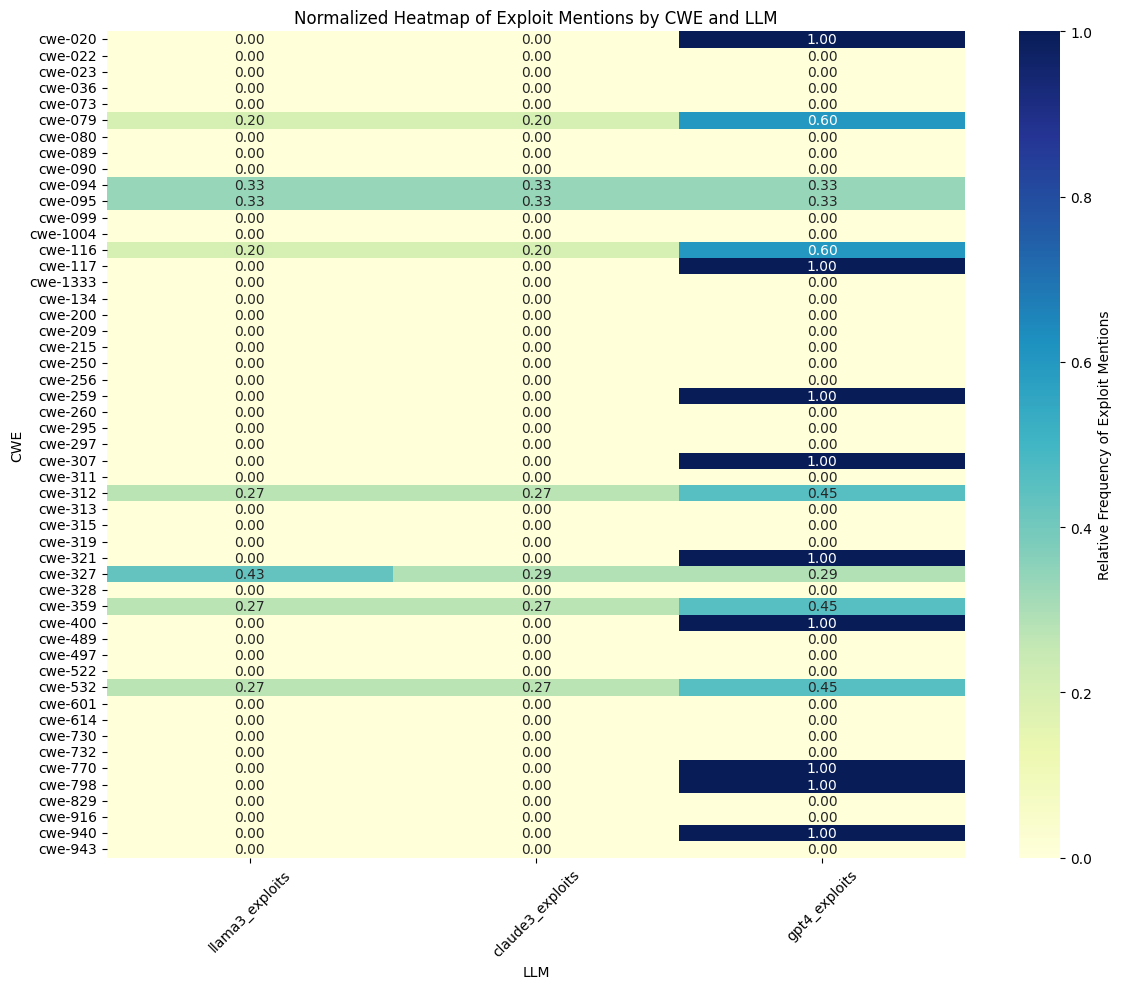

In [61]:
plt.figure(figsize=(12, 10))
sns.heatmap(exploits_data_normalized, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Relative Frequency of Exploit Mentions'})
plt.title('Normalized Heatmap of Exploit Mentions by CWE and LLM')
plt.xlabel('LLM')
plt.ylabel('CWE')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


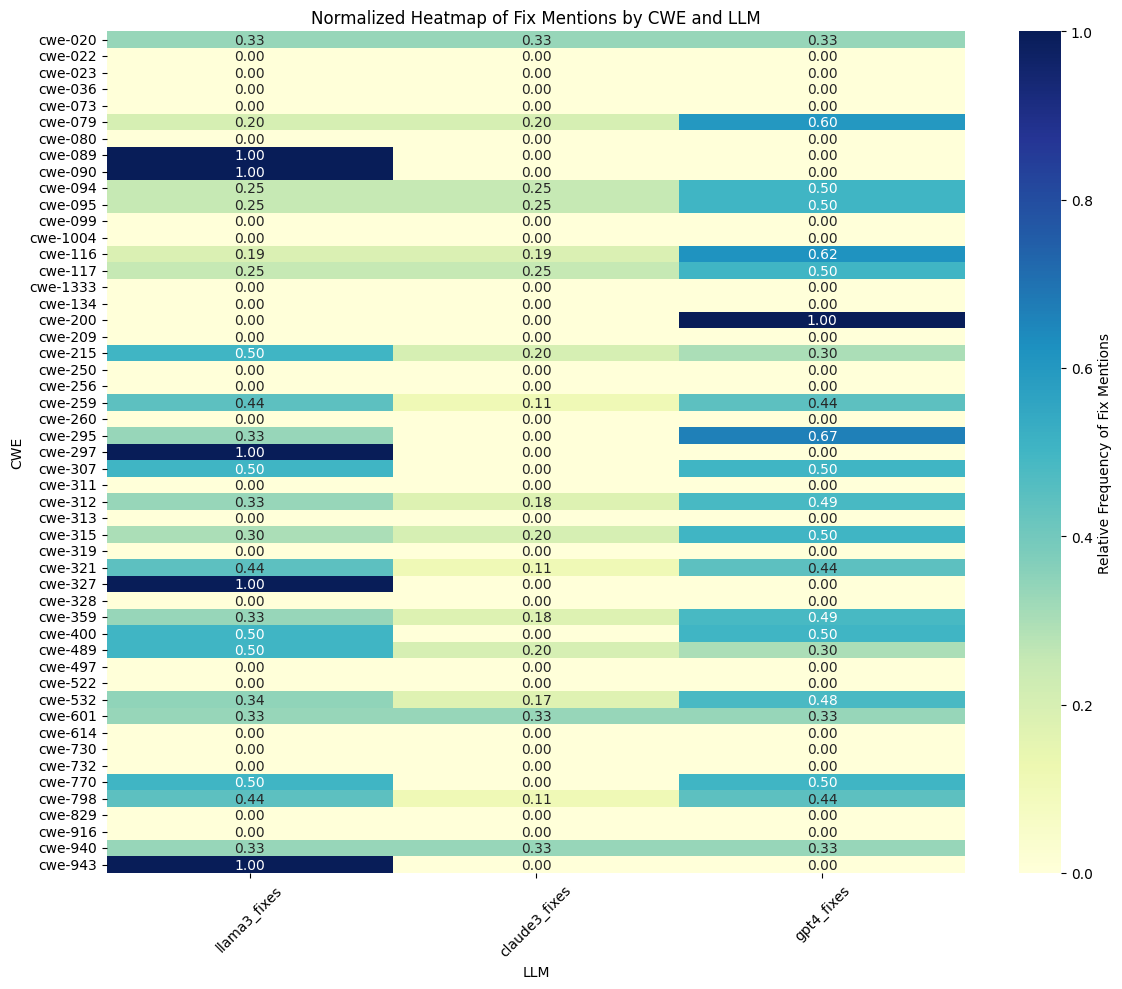

In [62]:
plt.figure(figsize=(12, 10))
sns.heatmap(fixes_data_normalized, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Relative Frequency of Fix Mentions'})
plt.title('Normalized Heatmap of Fix Mentions by CWE and LLM')
plt.xlabel('LLM')
plt.ylabel('CWE')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Comparison Table

Description: Create a table summarizing the number of security mentions, as well as 
the counts of causes, exploits, and fixes for each LLM and Stack Overflow. Steps:

1. Aggregate the data to count the total mentions for security, causes, exploits, and fixes.
2. Use Pandas to create a summary table and display it. 
3. Make the table with Word, Google Docs, Latex, or whatever is comfortable

In [63]:
summary_data = {
    'Source': ['llama3', 'claude3', 'gpt4', 'Stack Overflow'],
    'Security Mentions': [
        df['llama3_security_mention'].sum(),
        df['claude3_security_mention'].sum(),
        df['gpt4_security_mention'].sum(),
        152
    ],
    'Causes': [
        df['llama3_causes'].sum(),
        df['claude3_causes'].sum(),
        df['gpt4_causes'].sum(),
        df['causes'].sum()
    ],
    'Exploits': [
        df['llama3_exploits'].sum(),
        df['claude3_exploits'].sum(),
        df['gpt4_exploits'].sum(),
        df['exploits'].sum()
    ],
    'Fixes': [
        df['llama3_fixes'].sum(),
        df['claude3_fixes'].sum(),
        df['gpt4_fixes'].sum(),
        df['fixes'].sum()
    ]
}

print(len(df['llama3_security_mention']))

summary_table = pd.DataFrame(summary_data)

print(summary_table)


493
           Source  Security Mentions  Causes  Exploits  Fixes
0          llama3               93.0      90        22     84
1         claude3               55.0      49        21     42
2            gpt4              129.0     129        59    115
3  Stack Overflow              152.0     150        64    126


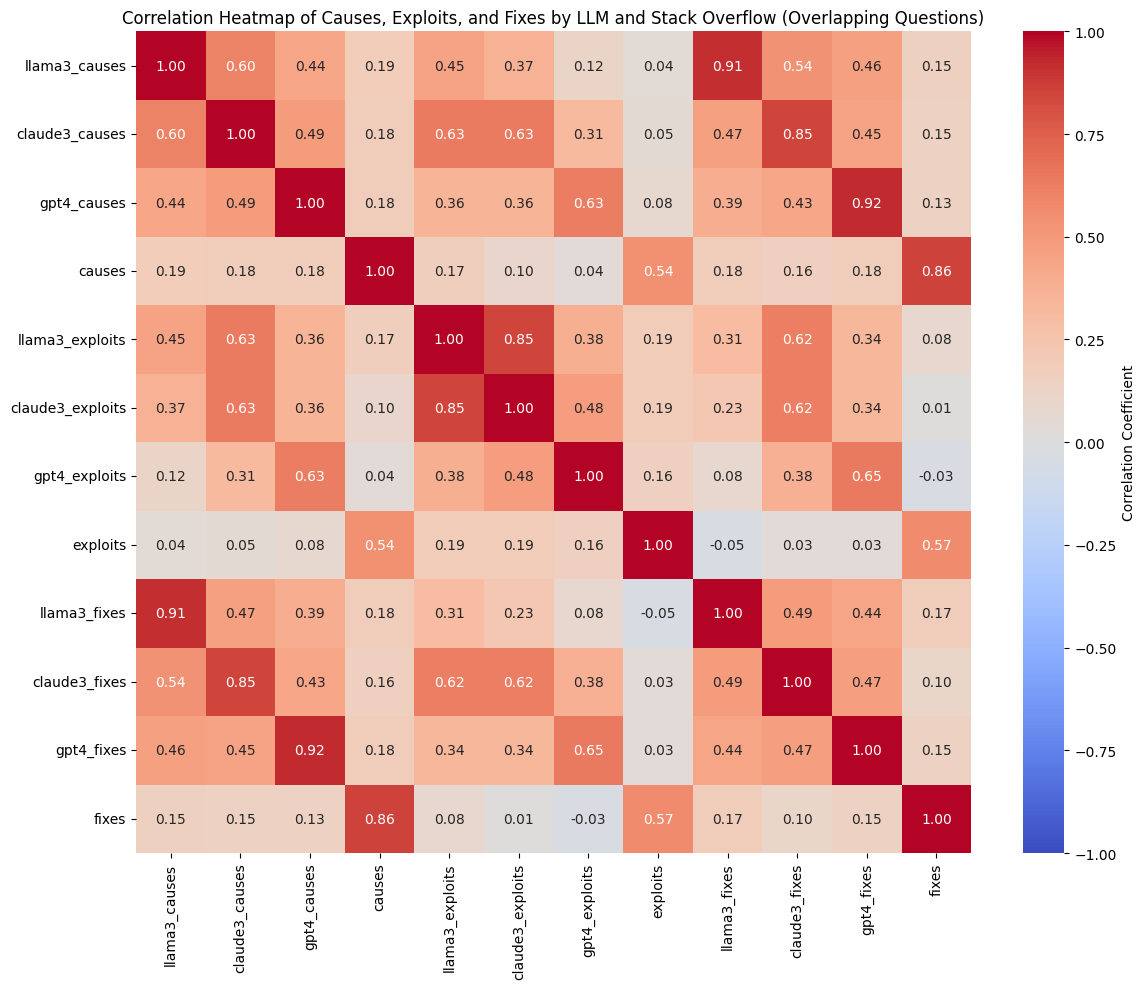

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('rq2_analysis_with_mention_150_results_full.csv')

# Convert security mention columns to numeric
columns = [
    'llama3_causes', 'claude3_causes', 'gpt4_causes', 'causes',
    'llama3_exploits', 'claude3_exploits', 'gpt4_exploits', 'exploits',
    'llama3_fixes', 'claude3_fixes', 'gpt4_fixes', 'fixes'
]

for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Process tags to get CWE
df['tags'] = df['tags'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
df = df.explode('tags')
df['tags'] = df['tags'].apply(lambda x: x if 'cwe' in x else None)
df = df.dropna(subset=['tags'])
df['CWE'] = df['tags'].apply(lambda x: x.split('/')[-1])

# Identify the overlapping questions
overlap_df = df[df.duplicated(subset=['stackoverflow_link'], keep=False)]

# Calculate the correlation matrix for overlapping questions
corr_data_overlap = overlap_df[columns]
corr_matrix_overlap = corr_data_overlap.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_overlap, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Causes, Exploits, and Fixes by LLM and Stack Overflow (Overlapping Questions)')
plt.tight_layout()
plt.show()


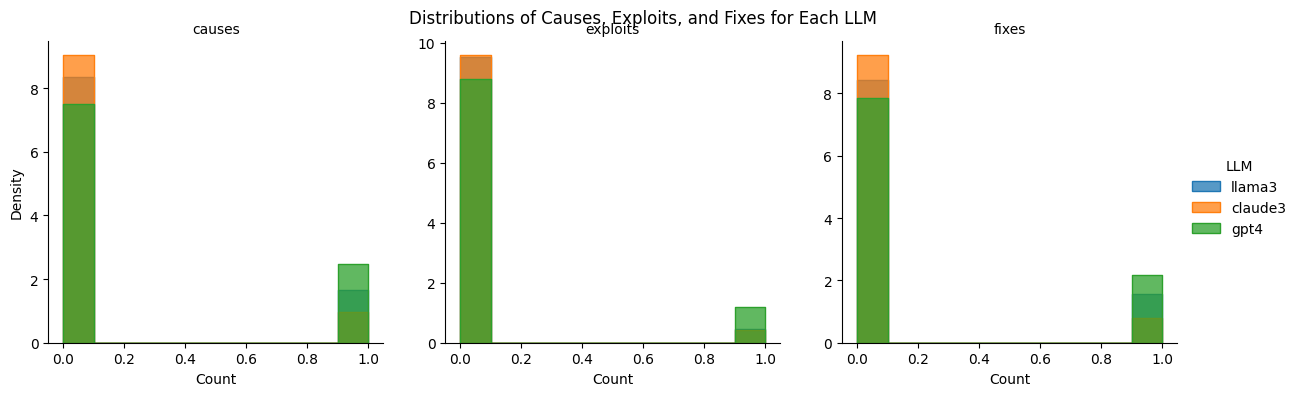

In [71]:

facet_data = df.melt(id_vars=['Questions'], 
                     value_vars=['llama3_causes', 'claude3_causes', 'gpt4_causes', 'causes',
                                 'llama3_exploits', 'claude3_exploits', 'gpt4_exploits', 'exploits',
                                 'llama3_fixes', 'claude3_fixes', 'gpt4_fixes', 'fixes'],
                     var_name='Type', value_name='Count')

facet_data['LLM'] = facet_data['Type'].str.extract(r'(\w+)_')[0]
facet_data['Metric'] = facet_data['Type'].str.extract(r'_(\w+)$')[0]

g = sns.FacetGrid(facet_data, col='Metric', hue='LLM', col_wrap=3, sharey=False, height=4)
g.map(sns.histplot, 'Count', kde=False, bins=10, element="step", stat="density")
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Count", "Density")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distributions of Causes, Exploits, and Fixes for Each LLM')
plt.show()